In [2]:
import numpy as np
import random as rand
%matplotlib inline

# Open the linker address map file
with open('arena.map', 'r') as f:
    # Read the contents of the file
    lines = f.readlines()

# Filter out the lines that do not contain map data
map_data = [line.strip() for line in lines if '.' in line or 'T' in line]

# Convert the map data to a 2D NumPy array
map_array = np.array([list(line) for line in map_data])

# Print the NumPy array
print(map_array.shape)



(49, 49)


#Character Location using Go-Explore
The only thing we need to store is really the coordinates of the map, in which case we are simply going to just use the indices of the map. 

In [3]:
%%time #gives how long it takes to run the cell
location_x = 5
location_y = 5

viz = np.zeros(map_array.shape)

CellStates : dict = {(5,5) : True}
#we will just remember true or false for if it has been explored yet or not.
def show_map():
    for i in map_array:
        print(i)

def recall_location():
    return location_x,location_y

def move_location(locationX, locationY):
    global location_x,location_y
    location_x = locationX
    location_y = locationY
    check_CellStates(location_x,location_y)
    map_array[location_x][location_y] = "0"
    #print(location_x,location_y)

def check_CellStates(locationX, locationY) -> bool:
    if (locationX,location_y) in CellStates:
        return True
    else:
        CellStates[(locationX,locationY)] = True
        viz[locationX,locationY] = 1 + i
        return False

def select_cell():
    clx, cly = recall_location()
    #random int
    random_direction =  rand.randint(0,3) #0,1,2,3 
    #check to see if the movement is even valid. 

    match random_direction:
        case 0: #move up
            if (cly < 49 and map_array[clx][cly + 1] != "T"):
                move_location(clx,cly+1) 
            else:
                select_cell()

        case 1: #move to right
            if (clx < 49 and map_array[clx +1][cly] != "T"):
                move_location(clx + 1,cly)
            else:
                select_cell()

        case 2: #move down
            if (cly > 0 and map_array[clx][cly - 1] != "T"):
                move_location(clx,cly-1) 
            else:
                select_cell()

        case 3: #move to left
            if (clx > 0 and map_array[clx - 1][cly] != "T"):
                move_location(clx - 1,cly)
            else:
                select_cell()

def Teleport():
    key_list = list(CellStates.keys())
    random_key = rand.choice(key_list)
    move_location(random_key[0],random_key[1])

for i in range(150000):
    if i % 5 == 0:
        Teleport()
    else:
        select_cell()
show_map()

counter = 0 
for i in range(len(map_array)):
    for j in range(len(map_array[0])):
        if map_array[i][j] == ".":
            counter+= 1

print(counter)
# save array into csv file 
#np.savetxt("data3.csv", map_array,  delimiter = ",")
#hey so def in 200,000 iterations, the 49 by 49 map is completely explored and runtime was only 



UsageError: Can't use statement directly after '%%time'!


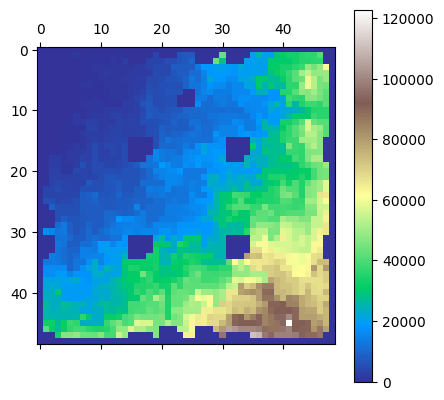

In [ ]:

matshow(viz,cmap = "terrain")
colorbar()